In [1]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
from skimpy import clean_columns

In [2]:
os.chdir("/Users/emanwong/Documents/UMich/wn23/si618/proj")

# Load Data

In [3]:
DATA_DIR = 'data'
def data_path(filename, data_dir = DATA_DIR):
    return f"{data_dir}/{filename}"
air_pollution_filename = "air_pollution_emissions.csv"
alcohol_expenditure_filename = "alcohol_expenditure_usa_long_term.csv"
cancer_death_filename = "cancer_death_rates_in_the_US_over_the_long_term.csv"
hospital_admissions_filename = "total-hospital-admissions-in-the-united-states-1946-2019.xlsx"
demographic_indicators_filename = "WPP2022_GEN_F01_DEMOGRAPHIC_INDICATORS_COMPACT_REV1.xlsx"

### Hospital Admissions

In [4]:
# read data
hospital_admissions = pd.read_excel(data_path(hospital_admissions_filename), sheet_name = 1)
# remove junk columns & rows
hospital_admissions = hospital_admissions.drop(columns=['Unnamed: 0'])
hospital_admissions = hospital_admissions.iloc[4:,:]
# rename columns
hospital_admissions.rename(columns={'Unnamed: 1':'year', 'Unnamed: 2':'num_admissions_1000s'}, inplace=True)
# fix type
hospital_admissions['year'] = pd.to_numeric(hospital_admissions['year'])
# set dates
hospital_admissions = hospital_admissions.loc[(hospital_admissions['year'] >= 1950) & (hospital_admissions['year'] <= 2011)]
hospital_admissions.set_index('year', inplace=True)

In [5]:
hospital_admissions.head(10)

,num_admissions_1000s
year,
1950,18483.0
1955,21073.0
1960,25027.0
1965,28812.0
1970,31759.0
1971,32664.0
1972,33265.0
1973,34352.0
1974,35506.0


<AxesSubplot: xlabel='year'>

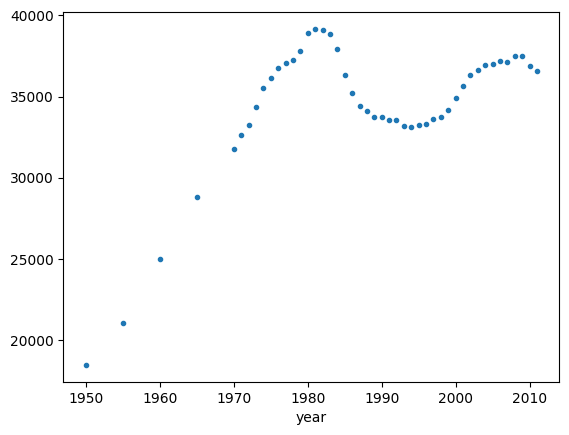

In [6]:
hospital_admissions['num_admissions_1000s'].plot(style='.')

### Demographic Indicators

In [7]:
# read data
demographic_indicators = pd.read_excel(data_path(demographic_indicators_filename), sheet_name=0)
# remove junk rows and set header
demographic_indicators_header = demographic_indicators.iloc[15,:]
demographic_indicators = demographic_indicators.iloc[16:,:]
demographic_indicators.columns = demographic_indicators_header
# select USA data
demographic_indicators = demographic_indicators.loc[demographic_indicators['Region, subregion, country or area *'] == 'United States of America']
# rename columns
demographic_indicators.rename(
    columns={'Year': 'year',
             'Total Population, as of 1 July (thousands)': 'total_population',
             'Male Population, as of 1 July (thousands)': 'male_population',
             'Female Population, as of 1 July (thousands)': 'female_population'},
    inplace=True)
# select relevant columns
demographic_cols = ['year', 'total_population', 'male_population', 'female_population']
demographic_indicators = demographic_indicators[demographic_cols]
# set dates and index
demographic_indicators = demographic_indicators.loc[(demographic_indicators['year'] >= 1950) & (demographic_indicators['year'] <= 2011)]
demographic_indicators.columns.name = None
demographic_indicators.set_index('year', inplace=True)
demographic_indicators

,total_population,male_population,female_population
year,,,
1950,148281.55,73516.095,74765.455
1951,150598.453,74784.499,75813.955
1952,152941.727,76079.283,76862.444
1953,155451.199,77221.443,78229.756
1954,158205.873,78577.893,79627.98
...,...,...,...
2007,302743.399,149147.06,153596.338
2008,305694.91,150592.791,155102.12
2009,308512.035,151968.684,156543.351


### Cancer Death Rates (per 100,000)

In [8]:
# read data
cancer_death = pd.read_csv(data_path(cancer_death_filename))
# set dates
cancer_death = cancer_death.loc[(cancer_death['Year'] >= 1950) & (cancer_death['Year'] <= 2011)]
# basic cleaning
cancer_death = clean_columns(cancer_death)
cancer_death.drop('entity', axis=1, inplace=True)
cancer_death.set_index('year', inplace=True)
cancer_death.head()

16 column names have been cleaned

,stomach_male,colon_and_rectum_male,liver_male,pancreas_male,lung_and_bronchus_male,prostate_male,leukemia_male,stomach_female,colon_and_rectum_female,pancreas_female,lung_and_bronchus_female,breast_female,uterus_female,liver_female
year,,,,,,,,,,,,,,
1950,31.1,33.1,8.6,9.9,24.3,28.9,8.2,17.6,32.3,6.8,5.8,31.9,26.2,9.8
1951,29.7,32.3,8.3,10.3,25.8,28.6,8.7,16.5,31.9,6.7,5.9,31.6,24.5,9.4
1952,28.7,32.8,8.1,10.4,28.0,29.7,8.8,16.1,31.5,7.1,6.1,31.6,23.8,9.5
1953,28.1,33.0,8.0,10.7,30.4,29.8,9.1,15.6,31.4,7.1,6.0,32.2,23.6,9.2
1954,27.3,32.6,7.7,11.2,31.7,30.5,9.4,14.8,31.2,7.3,6.0,31.8,22.5,8.7


### Alcohol Expenditure

In [9]:
alcohol_expenditure = pd.read_csv(data_path(alcohol_expenditure_filename))
# select dates
alcohol_expenditure = alcohol_expenditure.loc[(alcohol_expenditure['Year'] >= 1950) & (alcohol_expenditure['Year'] <= 2011)]
# clean names and set index
alcohol_expenditure = clean_columns(alcohol_expenditure)
alcohol_expenditure.set_index('year', inplace=True)
# rename and subset relevant cols
alcohol_expenditure.rename(
    columns={'total_at_home_usda_2018': 'alc_exp_at_home',
             'total_away_from_home': 'alc_exp_away_fr_home',
             'total_alcohol_expenditure_usda_2018': 'alc_exp_total'},
    inplace=True
)
relevant_alc_cols = [
    'alc_exp_at_home',
    'alc_exp_away_fr_home',
    'alc_exp_total'
]
alcohol_expenditure = alcohol_expenditure[relevant_alc_cols]
alcohol_expenditure.head()

11 column names have been cleaned

,alc_exp_at_home,alc_exp_away_fr_home,alc_exp_total
year,,,
1950,3455000000,4413000000,7868000000
1951,3789000000,4765000000,8554000000
1952,3999000000,4899000000,8898000000
1953,4080000000,4960000000,9040000000
1954,4189000000,4946000000,9135000000


### Air Pollution

In [10]:
# read data
air_pollution = pd.read_csv(data_path(air_pollution_filename), low_memory=False)
# select USA data
air_pollution = air_pollution.loc[air_pollution['Entity'] == 'United States']
# fix column dtype
air_pollution['nh3_per_capita'] = pd.to_numeric(air_pollution['nh3_per_capita'])
# select dates 
air_pollution = air_pollution.loc[(air_pollution['Year'] >= 1950) & (air_pollution['Year'] <= 2011)]
# clean names and set index
air_pollution = clean_columns(air_pollution)
air_pollution.set_index('year', inplace=True)
# subset cols
air_pol_rel_cols = [
    'nox_per_capita', 
    'so_2_per_capita', 
    'co_per_capita', 
    'oc_per_capita',
    'nmvoc_per_capita', 
    'bc_per_capita', 
    'nh_3_per_capita'
]
air_pollution = air_pollution[air_pol_rel_cols]
air_pollution.head()

6 column names have been cleaned

,nox_per_capita,so_2_per_capita,co_per_capita,oc_per_capita,nmvoc_per_capita,bc_per_capita,nh_3_per_capita
year,,,,,,,
1950,87.872567,113.791573,660.499190,6.120093,106.463437,3.749932,9.289717
1951,92.284438,117.679654,681.203964,5.698752,111.268008,3.501867,9.570112
1952,92.125837,111.202933,680.903893,5.305718,112.090448,3.221975,9.744620
1953,93.192457,111.909954,690.662295,4.836261,114.208577,2.935008,9.946302
1954,90.616479,102.869296,674.088049,4.476236,112.303428,2.655331,10.007221


# Data Wrangling

#### Hospital admissions

Between 1950 and 1970, the data is recorded every 5 years. We will have to introduce the missing years into the data and fill in the missing values (using pandas' interpolation).

In [11]:
hospital_admissions = hospital_admissions.reindex(range(1950, 2012))
hospital_admissions.head(7)

,num_admissions_1000s
year,
1950,18483.0
1951,NaN
1952,NaN
1953,NaN
1954,NaN
1955,21073.0
1956,NaN


We try 3 methods of interpolation – linear, quadratic and cubic, and plot their values.

<AxesSubplot: xlabel='year'>

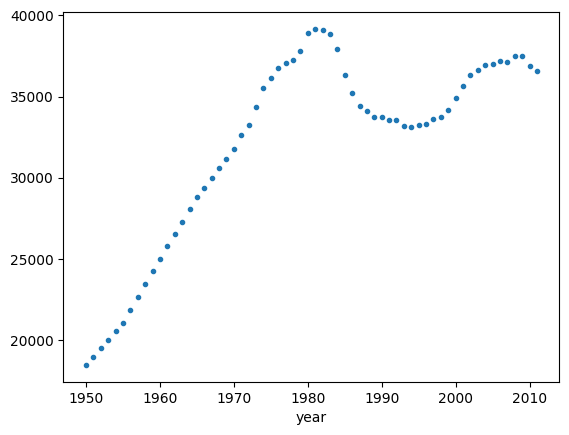

In [12]:
hospital_admissions.interpolate(method='linear')['num_admissions_1000s'].plot(style='.')

<AxesSubplot: xlabel='year'>

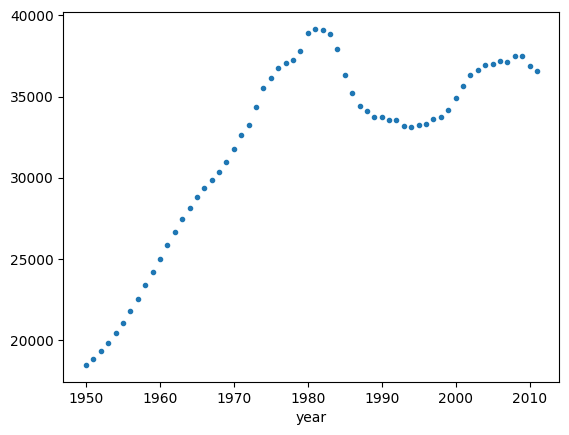

In [13]:
hospital_admissions.interpolate(method='quadratic')['num_admissions_1000s'].plot(style='.')

<AxesSubplot: xlabel='year'>

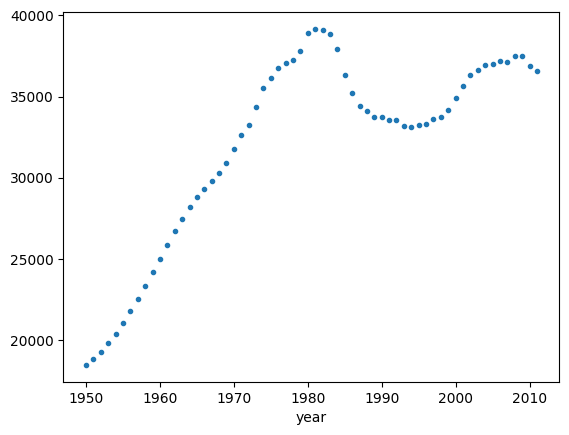

In [14]:
hospital_admissions.interpolate(method='cubic')['num_admissions_1000s'].plot(style='.')

We see that the quadratic interpolation appears to give more realistic looking values when simply comparin their plots. When using cubic interpolation, we see that there does not appear to be any significant difference compared to the quadratic interpolation, and thus we settle on the quadratic interpolation, so as to avoid potential overfitting with a higher order polynomial interoplation.

In [15]:
hospital_admissions.interpolate(method='quadratic', inplace=True)

We are interested in the admissions per capita, and as such, in our pre-processing step we will multiply the `num_admissions_1000s` column by $1000$ in order to achieve the approximate raw number of approximations, which we will later divide by the population.

In [16]:
hospital_admissions['num_admissions_total'] = hospital_admissions['num_admissions_1000s'] * 1000
hospital_admissions.head()

,num_admissions_1000s,num_admissions_total
year,,
1950,18483.000000,1.848300e+07
1951,18874.298477,1.887430e+07
1952,19328.947715,1.932895e+07
1953,19846.947715,1.984695e+07
1954,20428.298477,2.042830e+07


#### Joining and Further Processing

In [17]:
merged_df = hospital_admissions.copy()
dfs_to_merge = [
    demographic_indicators,
    cancer_death,
    alcohol_expenditure,
    air_pollution
]

In [18]:
for df in dfs_to_merge:
    merged_df = merged_df.merge(
        df, 
        how='left',
        left_index=True,
        right_index=True,
        suffixes=(None, None)
    )
merged_df.head()

,num_admissions_1000s,num_admissions_total,total_population,male_population,female_population,stomach_male,colon_and_rectum_male,liver_male,pancreas_male,lung_and_bronchus_male,...,alc_exp_at_home,alc_exp_away_fr_home,alc_exp_total,nox_per_capita,so_2_per_capita,co_per_capita,oc_per_capita,nmvoc_per_capita,bc_per_capita,nh_3_per_capita
year,,,,,,,,,,,,,,,,,,,,,
1950,18483.000000,1.848300e+07,148281.55,73516.095,74765.455,31.1,33.1,8.6,9.9,24.3,...,3455000000,4413000000,7868000000,87.872567,113.791573,660.499190,6.120093,106.463437,3.749932,9.289717
1951,18874.298477,1.887430e+07,150598.453,74784.499,75813.955,29.7,32.3,8.3,10.3,25.8,...,3789000000,4765000000,8554000000,92.284438,117.679654,681.203964,5.698752,111.268008,3.501867,9.570112
1952,19328.947715,1.932895e+07,152941.727,76079.283,76862.444,28.7,32.8,8.1,10.4,28.0,...,3999000000,4899000000,8898000000,92.125837,111.202933,680.903893,5.305718,112.090448,3.221975,9.744620
1953,19846.947715,1.984695e+07,155451.199,77221.443,78229.756,28.1,33.0,8.0,10.7,30.4,...,4080000000,4960000000,9040000000,93.192457,111.909954,690.662295,4.836261,114.208577,2.935008,9.946302
1954,20428.298477,2.042830e+07,158205.873,78577.893,79627.98,27.3,32.6,7.7,11.2,31.7,...,4189000000,4946000000,9135000000,90.616479,102.869296,674.088049,4.476236,112.303428,2.655331,10.007221


In [19]:
merged_df.columns

Index(['num_admissions_1000s', 'num_admissions_total', 'total_population',
       'male_population', 'female_population', 'stomach_male',
       'colon_and_rectum_male', 'liver_male', 'pancreas_male',
       'lung_and_bronchus_male', 'prostate_male', 'leukemia_male',
       'stomach_female', 'colon_and_rectum_female', 'pancreas_female',
       'lung_and_bronchus_female', 'breast_female', 'uterus_female',
       'liver_female', 'alc_exp_at_home', 'alc_exp_away_fr_home',
       'alc_exp_total', 'nox_per_capita', 'so_2_per_capita', 'co_per_capita',
       'oc_per_capita', 'nmvoc_per_capita', 'bc_per_capita',
       'nh_3_per_capita'],
      dtype='object')

In [28]:
df = merged_df.copy()

We have all the data joined and will perform the following processing:
1. Get the hospital admissions per capita
2. Get the complete death rate for each cancer type (remove separation by gender)
3. Get the complete death rate from all types of cancer
4. Get the alcohol expenditure values per capita

In [29]:
# get hospital admissions per capita
df['admissions_per_capita'] = df['num_admissions_total'] / df['total_population']

In [30]:
def cancer_deaths_helper(df, cancer_type):
    n_indiv = 100_000
    male_col = f"{cancer_type}_male"
    female_col = f"{cancer_type}_female"
    try:
        male_deaths = (df[male_col] / n_indiv) * df['male_population']
    except Exception as e:
        male_deaths = 0
    try:
        female_deaths = (df[female_col] / n_indiv) * df['female_population']
    except Exception as e:
        female_deaths = 0
    deaths = male_deaths + female_deaths
    total_rate = deaths / df['total_population']
    return total_rate

In [31]:
# get death rate per cancer type
cancer_types = ['stomach', 'colon_and_rectum', 'liver', 'pancreas', 'lung_and_bronchus',
                'prostate', 'leukemia', 'breast', 'uterus']

for cancer_type in cancer_types:
    df[cancer_type] = cancer_deaths_helper(df, cancer_type)


In [32]:
# get cancer death rates total
df['all_cancer'] = 0
for cancer_type in cancer_types:
    df['all_cancer'] += df[cancer_type]

In [33]:
# get alcohol expenditure per capita
df['alc_exp_at_home_per_capita'] = df['alc_exp_at_home'] / df['total_population']
df['alc_exp_away_fr_home_per_capita'] = df['alc_exp_away_fr_home'] / df['total_population']
df['alc_exp_total_per_capita'] = df['alc_exp_total'] / df['total_population']

In [34]:
df.columns

Index(['num_admissions_1000s', 'num_admissions_total', 'total_population',
       'male_population', 'female_population', 'stomach_male',
       'colon_and_rectum_male', 'liver_male', 'pancreas_male',
       'lung_and_bronchus_male', 'prostate_male', 'leukemia_male',
       'stomach_female', 'colon_and_rectum_female', 'pancreas_female',
       'lung_and_bronchus_female', 'breast_female', 'uterus_female',
       'liver_female', 'alc_exp_at_home', 'alc_exp_away_fr_home',
       'alc_exp_total', 'nox_per_capita', 'so_2_per_capita', 'co_per_capita',
       'oc_per_capita', 'nmvoc_per_capita', 'bc_per_capita', 'nh_3_per_capita',
       'admissions_per_capita', 'stomach', 'colon_and_rectum', 'liver',
       'pancreas', 'lung_and_bronchus', 'prostate', 'leukemia', 'breast',
       'uterus', 'all_cancer', 'alc_exp_at_home_per_capita',
       'alc_exp_away_fr_home_per_capita', 'alc_exp_total_per_capita'],
      dtype='object')

In [35]:
columns_of_interest = [
    'stomach_male', 'colon_and_rectum_male', 'liver_male', 'pancreas_male',
    'lung_and_bronchus_male', 'prostate_male', 'leukemia_male',
    'stomach_female', 'colon_and_rectum_female', 'pancreas_female',
    'lung_and_bronchus_female', 'breast_female', 'uterus_female',
    'liver_female', 'nox_per_capita', 'so_2_per_capita', 'co_per_capita',
    'oc_per_capita', 'nmvoc_per_capita', 'bc_per_capita', 'nh_3_per_capita',
    'admissions_per_capita', 'stomach', 'colon_and_rectum', 'liver',
    'pancreas', 'lung_and_bronchus', 'prostate', 'leukemia', 'breast', 'uterus',
    'all_cancer', 'alc_exp_at_home_per_capita',
    'alc_exp_away_fr_home_per_capita', 'alc_exp_total_per_capita'
]
df_clean = df[columns_of_interest]

In [36]:
df_clean.head()

,stomach_male,colon_and_rectum_male,liver_male,pancreas_male,lung_and_bronchus_male,prostate_male,leukemia_male,stomach_female,colon_and_rectum_female,pancreas_female,...,pancreas,lung_and_bronchus,prostate,leukemia,breast,uterus,all_cancer,alc_exp_at_home_per_capita,alc_exp_away_fr_home_per_capita,alc_exp_total_per_capita
year,,,,,,,,,,,,,,,,,,,,,
1950,31.1,33.1,8.6,9.9,24.3,28.9,8.2,17.6,32.3,6.8,...,0.000083,0.00015,0.000143,0.000041,0.000161,0.000132,0.001372,23300.268982,29760.951379,53061.220361
1951,29.7,32.3,8.3,10.3,25.8,28.6,8.7,16.5,31.9,6.7,...,0.000085,0.000158,0.000142,0.000043,0.000159,0.000123,0.00135,25159.620996,31640.43126,56800.052256
1952,28.7,32.8,8.1,10.4,28.0,29.7,8.8,16.1,31.5,7.1,...,0.000087,0.00017,0.000148,0.000044,0.000159,0.00012,0.00136,26147.213572,32031.807775,58179.021347
1953,28.1,33.0,8.0,10.7,30.4,29.8,9.1,15.6,31.4,7.1,...,0.000089,0.000181,0.000148,0.000045,0.000162,0.000119,0.00137,26246.179034,31907.11961,58153.298644
1954,27.3,32.6,7.7,11.2,31.7,30.5,9.4,14.8,31.2,7.3,...,0.000092,0.000188,0.000151,0.000047,0.00016,0.000113,0.001363,26478.157356,31263.061897,57741.219253


`N.B. I'm leavin the male and female cancer stuff there in case we want to do some EDA split by gender`

# EDA

# Analysis/Modelling
